<a href="https://colab.research.google.com/github/sabumjung/DL-test/blob/master/%E3%80%8AMust_Have_%ED%85%90%EC%B4%88%EC%9D%98_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8A%B9%EA%B0%95%E3%80%8B_ex3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 불러오기

In [1]:
import math
import torch
import matplotlib.pyplot as plt

# ❶ -pi부터 pi사이에서 점을 1000개 추출

In [2]:
x = torch.linspace(-math.pi, math.pi, 1000) 

# ❷ 실제 사인곡선에서 추출한 값으로 y 만들기

In [3]:
y = torch.sin(x) 

# ❸ 임의의 가중치(계수)를 뽑아 예측용 y 만들기

In [4]:
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 사인 함수를 근사할 3차 다항식 정의

In [5]:
y_random = a * x**3 + b * x**2 + c * x + d

# 그래프 출력하기

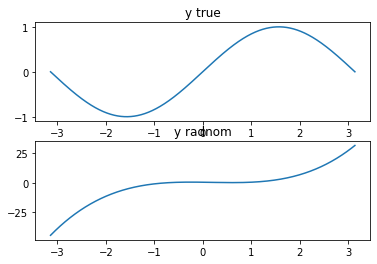

In [6]:
# ➍ 실제 y값으로 사인곡선 만들기
plt.subplot(2, 1, 1)
plt.title("y true")
plt.plot(x, y)

# ➎ 임의의 가중치로 만든 예측용 y값으로 사인곡선 만들기

plt.subplot(2, 1, 2)
plt.title("y radnom")
plt.plot(x, y_random)

# ➏ 그래프 출력하기
plt.show()

# 학습 전후 비교해보기

epoch1 loss:199357.703125
epoch101 loss:1310.6314697265625
epoch201 loss:1070.625
epoch301 loss:876.0852661132812
epoch401 loss:717.154541015625
epoch501 loss:587.2962646484375
epoch601 loss:481.1768493652344
epoch701 loss:394.4439697265625
epoch801 loss:323.54522705078125
epoch901 loss:265.58087158203125
epoch1001 loss:218.1836700439453
epoch1101 loss:179.42095947265625
epoch1201 loss:147.71434020996094
epoch1301 loss:121.77513122558594
epoch1401 loss:100.55045318603516
epoch1501 loss:83.18033599853516
epoch1601 loss:68.96232604980469
epoch1701 loss:57.32207107543945
epoch1801 loss:47.790557861328125
epoch1901 loss:39.98420715332031


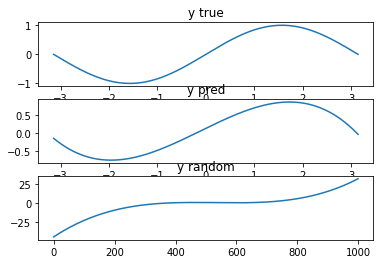

In [7]:
learning_rate = 1e-6 # 학습률 정의

for epoch in range(2000): # 학습 2000번 진행
   y_pred = a * x**3 + b * x**2 + c * x + d

   # 손실함수를 MSE로 정의함
   loss = (y_pred - y).pow(2).sum().item() # ❶ 손실 정의
   
   # 100 iteration마다 MSE값을 출력
   if epoch % 100 == 0:
       print(f"epoch{epoch+1} loss:{loss}")

   # 손실함수를 미분함
   grad_y_pred = 2.0 * (y_pred - y) # ❷ 기울기의 미분값

   grad_a = (grad_y_pred * x ** 3).sum()
   grad_b = (grad_y_pred * x ** 2).sum()
   grad_c = (grad_y_pred * x).sum()
   grad_d = grad_y_pred.sum()

   # 기울기(Gradient)를 이용하여 가중치를 업데이트
   # 가중치는 기울기의 반대방향으로 움직인다.(학습률 고려함)
   a -= learning_rate * grad_a # ❸ 가중치 업데이트
   b -= learning_rate * grad_b
   c -= learning_rate * grad_c
   d -= learning_rate * grad_d

# 첫번째 그림 : 원래 그래프, 두번째 그림 : 예측, 세번째 그림 : 랜덤
plt.subplot(3, 1, 1)
plt.title("y true")
plt.plot(x, y)
plt.subplot(3, 1, 2)
plt.title("y pred")
plt.plot(x, y_pred)
plt.subplot(3, 1, 3)
plt.plot(y_random)
plt.title("y random")
plt.show()